I'm using a dataset containing data on Covid-19 cases, deaths, and related information, the dataset can be found here:https://github.com/owid/covid-19-data/tree/master/public/data/

I'm going to be looking at ICU and hospital admissions in a Germany, France, and Italy and then comparing that to the aggregate data for all of Europe. I want to know if these countries are representative of Europe in this metric, and if these countries show similar trends in hospital and ICU admissions relative to each other.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('owid-covid-data.csv')
df


In [88]:
icu = pd.pivot_table(df, index = 'date', columns = 'location', values = 'weekly_icu_admissions_per_million')
hsp = pd.pivot_table(df, index = 'date', columns = 'location', values = 'weekly_hosp_admissions_per_million')


Text(0.5, 1.0, 'weekly_icu_admissions_per_million')

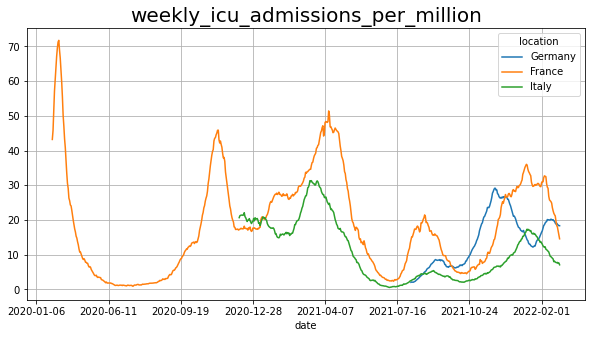

In [99]:
icu[['Germany', 'France', 'Italy']].plot(figsize = (10,5))
plt.grid()
plt.title('weekly_icu_admissions_per_million',fontsize=20)


In [ ]:
eu = df[df['continent']=='Europe']
dfgbi = eu.groupby(['date']).weekly_icu_admissions_per_million.agg(sum)
dfgbi.plot(figsize=(10,5))
plt.grid()
plt.title('Europe Aggregate ICU Admissions',fontsize=20)


Text(0.5, 1.0, 'weekly_hosp_admissions_per_million')

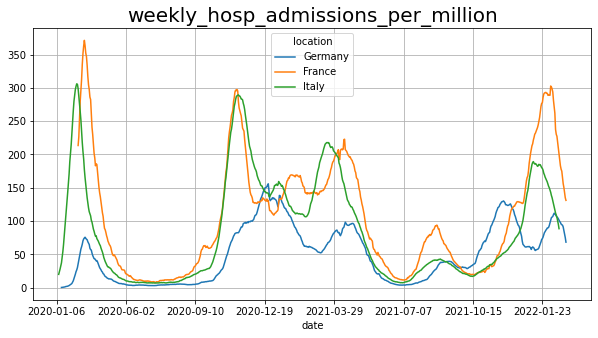

In [101]:
hsp[['Germany', 'France', 'Italy']].plot(figsize = (10,5))
plt.grid()
plt.title('weekly_hosp_admissions_per_million',fontsize=20)


Text(0.5, 1.0, 'Europe Aggregate Hospital Admissions')

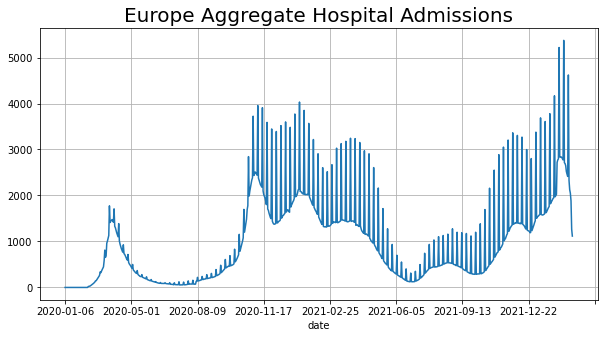

In [133]:
dfgba = eu.groupby(['date']).weekly_hosp_admissions_per_million.agg(sum)

dfgba.plot(figsize=(10,5))
plt.grid()
plt.title('Europe Aggregate Hospital Admissions',fontsize=20)


This analysis shows that France, Italy, and Germany are reasonable representative of europe as a whole, for both ICU and hospital admissions. The three countries are fairly consistent with each other as well, with a couple of exceptions. Around April 2021, France and Italy have very similar hospital admissions, but France has many more ICU admissions than Germany, indicating the cases were more severe on average. In addition, around January 2022, Germany and France have similar numbers of ICU admissions, but Italy significantly more hospital admissions, indicating their cases were less severe on average.

An interesting note is that the country graphs are "smooth" while the aggregate graphs exhibit spikes. I looked at the data and found this is because some countries reported the weekly admissions as the day-to-day average and some reported it as one day per week. As a result the aggregate shows this one day a week reporting and the top of the spikes shows more accurate data.